<a href="https://colab.research.google.com/github/Khalil1232/Machine-Learning-ULaval/blob/main/k_nearest_neighbours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Devoir 2, Question 3 : k-plus proches voisins

# Homework 2, Question 3: k-nearest neighbours

## Code préambule

## Preamble code

In [ ]:
import time
import numpy
import pandas
pandas.set_option('display.max_colwidth', 0)
import collections

from IPython import display

import matplotlib
%matplotlib notebook
matplotlib.rcParams['figure.figsize'] = (15.0, 10.0)
from matplotlib import pyplot

from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier

_times = []
def checkTime(maxduration, question):
    duration = _times[-1] - _times[-2]
    if duration > maxduration:
        print("[ATTENTION] Votre code pour la question {0} met trop de temps à s'exécuter! ".format(question)+
            "Le temps maximum permis est de {0:.4f} secondes, mais votre code a requis {1:.4f} secondes! ".format(maxduration,duration)+
            "Assurez-vous que vous ne faites pas d'appels bloquants (par exemple à show()) dans cette boucle!")


## Q3A
Utilisez une méthode de $k$-plus proches voisins sur le jeu de données des Iris de Fisher en normalisant les données. Pour le classifieur, vous pouvez utiliser directement l'implémentation de *scikit-learn* (`KNeighborsClassifier`). Utilisez les paramètres par défaut, sauf pour:
- Pondération (paramètre `weights`): Testez avec les valeurs `uniform` et `distance`;
- Nombre de voisins $k$ (paramètre `n_neighbors`): Pour les deux différentes pondérations, testez avec les valeurs {1, 3, 5, 7, 11, 13, 15, 25, 35, 45}.

Pour l'évaluation, utilisez une méthode de type *leave-one-out*. Rapportez la performance de chaque paramétrisation dans une figure synthèse.

Discutez **<u>brièvement</u>** des résultats. Quel est l'impact de la disposition des données dans l'espace pour cette méthode? Quel est le nombre de voisins $k$ optimal à utiliser?

## Q3A
Use a $k$-nearest neighbour method on the Fisher's Iris dataset by normalizing the data. For the classifier, you can use the *scikit-learn* implementation (`KNeighborsClassifier`) directly. Use the default settings, except for:
- Weighting (`weights` parameter): Test with `uniform` and `distance` values;
- Number of neighbours $k$ (parameter `n_neighbors`): For the two different weights, test with the values {1, 3, 5, 7, 11, 13, 15, 25, 35, 45}.

For evaluation, use a *leave-one-out* method. Report the performance of each parameterization in a summary figure.

Discuss **<u>briefly</u>** the results. What is the impact of data spatial arrangement for this method? What is the optimal number of $k$ neighbours to use?

### Entrez votre solution à Q3A dans la cellule ci-dessous

### Enter your answer to Q3A in the cell below

<div class="feedback-cell" style="background: rgba(100 , 100 , 100 , 0.4)">
                <h3>Votre soumission a été enregistrée!</h3>
                <ul>
                    <li>notez qu'il n'y a <strong>pas</strong> de correction automatique pour cet exercice&puncsp;;</li>
                    <li>par conséquent, votre note est <strong>actuellement</strong> zéro&puncsp;;</li>
                    <li>elle sera cependant ajustée par le professeur dès que la correction manuelle sera complétée&puncsp;;</li>
                    <li>vous pouvez soumettre autant de fois que nécessaire jusqu'à la date d'échéance&puncsp;;</li>
                    <li>mais évitez de soumettre inutilement.</li>
                </ul>
            </div>

<IPython.core.display.Javascript object>


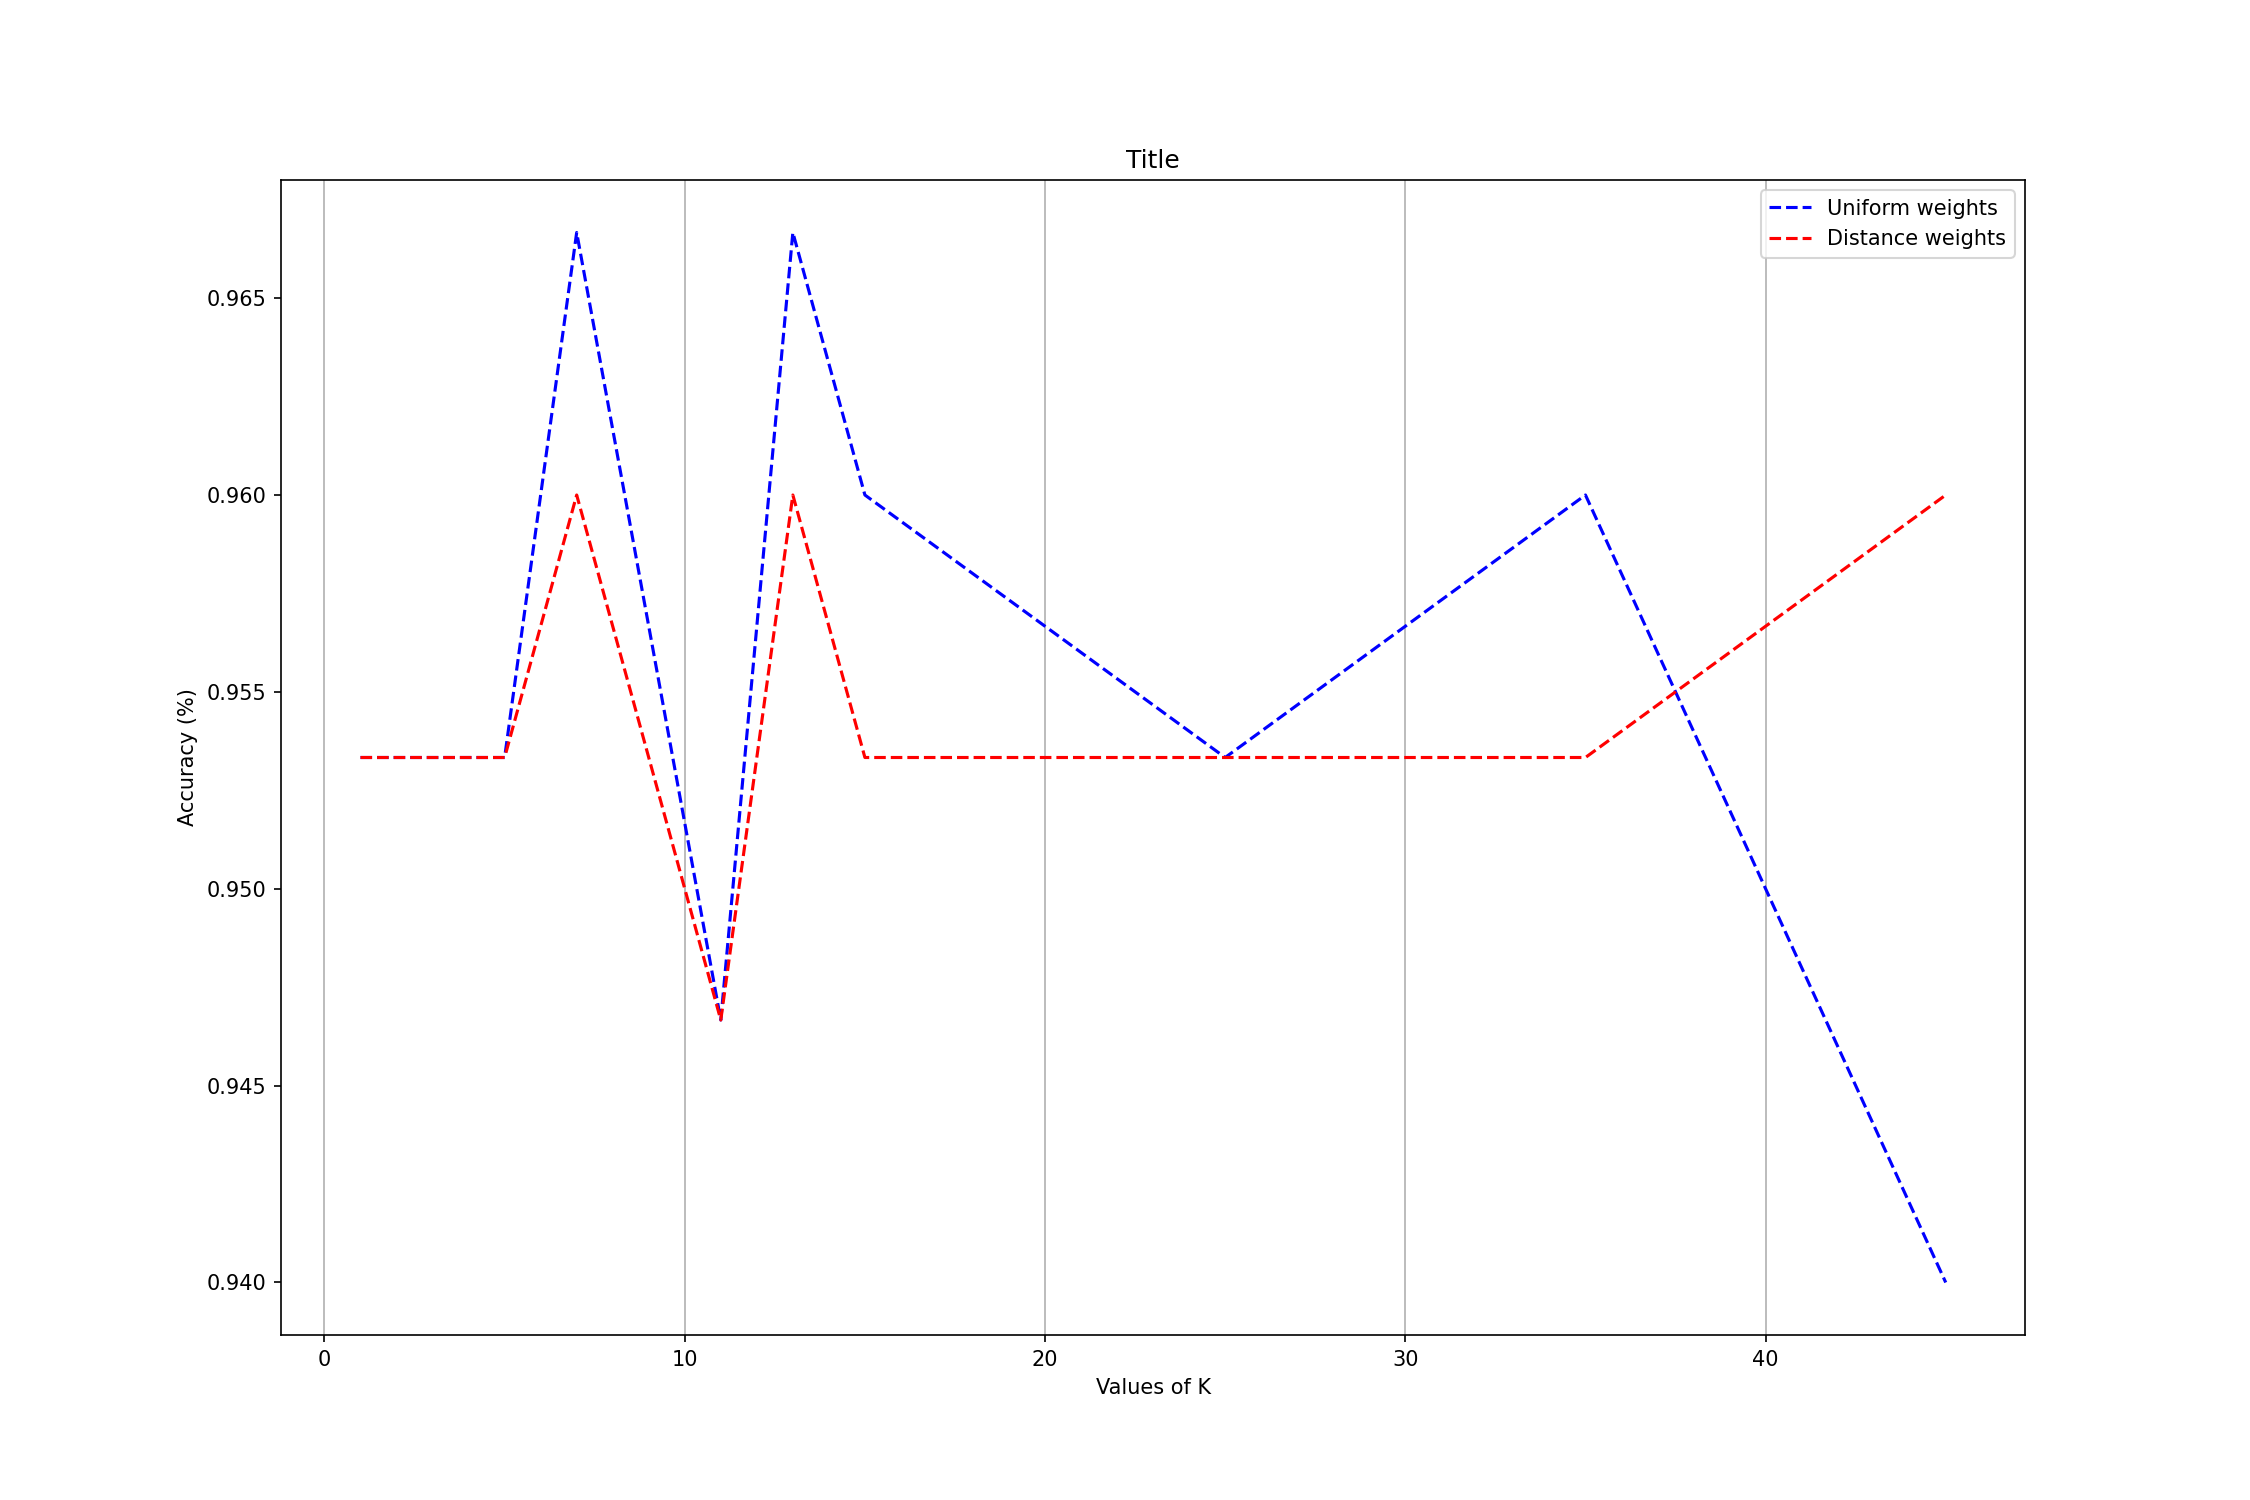

,Questions,Discussion
0,Quel est l'impact de la disposition des données dans l'espace?,"DistanceWeights weight points by the inverse of their distance, closer neighbors of a query point will have a greater influence than neighbors which are further away. but with UniformWeights All points in each neighborhood are weighted equally. this what explains the high performance of UniformWeights"
1,Quel est le K optimal?,"values of k=7 et k=13 are the best in term of accuracy, so we choose the small one k=7 because the time of execution will be shorter in this case"


In [ ]:
# Définition de la durée d'exécution maximale pour la question
# Definition of the maximum execution duration for the question
TMAX_Q3A = 15

# Dictionnaire pour enregistrer les paramètres évalués
# Dictionary for recording the evaluated parameters
results = collections.defaultdict(list)
results['Questions'] = ["Quel est l\'impact de la disposition des données dans l'espace?",
                        "Quel est le K optimal?",
                       ]
results['Discussion'] = []

_times.append(time.time())

# *** TODO Q3A ***
# Testez un classifeur K plus proches voisins sur le jeu de données
# L'évaluation doit être faite en utilisant une approche leave-one-out
# Testez avec k = {1, 3, 5, 7, 11, 13, 15, 25, 35, 45} et avec les valeurs
# "uniform" et "distance" comme valeur de l'argument "weights".
# N'oubliez pas de normaliser le jeu de données en utilisant minmax_scale!
# Test a k-nearest neighbours classifier on the dataset
# The evaluation should be done using a leave-one-out approach
# Test with k = {1, 3, 5, 7, 11, 13, 15, 25, 35, 45} and with the values
# "uniform" and "distance" as the value of the "weights" argument.
# Don't forget to normalize the dataset using minmax_scale!
# Stockez les performances obtenues (précision moyenne pour chaque valeur de k)
# dans deux listes, scoresUniformWeights pour weights=uniform et
# scoresDistanceWeights pour weights=distance
# Le premier élément de chacune de ces listes devrait contenir la précision
# pour k=1, le second la précision pour k=3, et ainsi de suite.
# Store the obtained performances (average precision for each value of k)
# in two lists, scoresUniformWeights for weights=uniform and
# scoresDistanceWeights for weights=distance
# The first element of each of these lists should contain the precision
# for k=1, the second the precision for k=3, and so on.
scoresUniformWeights = []
scoresDistanceWeights = []
# ******
data = load_iris()
X = data.data
y = data.target
X = minmax_scale(X)

clf = LeaveOneOut()
k_list = [1, 3, 5, 7, 11, 13, 15, 25, 35, 45]
for k in k_list:
    clf1 = KNeighborsClassifier(weights='uniform', n_neighbors= k)
    clf2 = KNeighborsClassifier(weights='distance', n_neighbors= k)
    sum1 = 0
    sum2 = 0
    for train_index, test_index in clf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf1.fit(X_train, y_train)
        sum1 += clf1.score(X_test, y_test)
        clf2.fit(X_train, y_train)
        sum2 += clf2.score(X_test, y_test)
    scoresUniformWeights.append((float)(sum1/ len(X)))
    scoresDistanceWeights.append((float)(sum2/ len(X)))

_times.append(time.time())
checkTime(TMAX_Q3A, "Q3A")

# *** TODO Q3A ***
# Produisez un graphique contenant deux courbes, l'une pour weights=uniform
# et l'autre pour weights=distance. L'axe x de la figure doit être le nombre
# de voisins et l'axe y la performance en leave-one-out
# Produce a graph containing two curves, one for weights=uniform
# and the other for weights=distance. The x axis of the figure should be the number
# of neighbours and the y-axis the leave-one-out performance
#fig, (ax) = pyplot.subplots(1, 1, sharex=True)

fig = pyplot.figure()
ax = fig.add_subplot(111)
ax.plot(k_list, scoresUniformWeights, 'b--', label="Uniform weights")
ax.plot(k_list, scoresDistanceWeights, 'r--', label="Distance weights")
ax.set_title('Title')  # À modifier / to be modified
# ax.plot(X, y, 'r--', label="Distance weights") # À compléter / to be completed
# ax.plot(X, y, 'b--', label="Uniform weights")  # À compléter / to be completed
# ax.set_xticks(X, X)
ax.grid(axis='x')
ax.legend(['Uniform weights','Distance weights'])
ax.set_xlabel("Values of K")
ax.set_ylabel("Accuracy (%)")

# ******

# *** TODO Q3A ***

# Répondez aux quelques questions pour la discussion
# Answer a few questions for discussion

# Quel est l'impact de la disposition des données dans l'espace?
# What is the impact of the layout of the data in the space?
answer = "DistanceWeights weight points by the inverse of their distance, closer neighbors of a query point will have a greater influence than neighbors which are further away. \
        but with UniformWeights All points in each neighborhood are weighted equally. this what explains the high performance of UniformWeights "
results['Discussion'].append(answer)

# Quel est le nombre de voisins $k$ optimal à utiliser?
# What is the optimal number of $k$ neighbors to use?
answer = " values of k=7 et k=13 are the best in term of accuracy, so we choose the small one k=7 because the time of execution will be shorter in this case "
results['Discussion'].append(answer)
# ******

# Affichage des erreurs
df = pandas.DataFrame(results)
display.display(df)

### Patron de code réponse à l'exercice Q3A

### Q3A answer code template

In [ ]:
# Définition de la durée d'exécution maximale pour la question
# Definition of the maximum execution duration for the question
TMAX_Q3A = 15

# Dictionnaire pour enregistrer les paramètres évalués
# Dictionary for recording the evaluated parameters
results = collections.defaultdict(list)
results['Questions'] = ["Quel est l\'impact de la disposition des données dans l'espace?",
                        "Quel est le K optimal?",
                       ]
results['Discussion'] = []

_times.append(time.time())

# *** TODO Q3A ***
# Testez un classifeur K plus proches voisins sur le jeu de données
# L'évaluation doit être faite en utilisant une approche leave-one-out
# Testez avec k = {1, 3, 5, 7, 11, 13, 15, 25, 35, 45} et avec les valeurs
# "uniform" et "distance" comme valeur de l'argument "weights".
# N'oubliez pas de normaliser le jeu de données en utilisant minmax_scale!
# Test a k-nearest neighbours classifier on the dataset
# The evaluation should be done using a leave-one-out approach
# Test with k = {1, 3, 5, 7, 11, 13, 15, 25, 35, 45} and with the values
# "uniform" and "distance" as the value of the "weights" argument.
# Don't forget to normalize the dataset using minmax_scale!

# Stockez les performances obtenues (précision moyenne pour chaque valeur de k)
# dans deux listes, scoresUniformWeights pour weights=uniform et
# scoresDistanceWeights pour weights=distance
# Le premier élément de chacune de ces listes devrait contenir la précision
# pour k=1, le second la précision pour k=3, et ainsi de suite.
# Store the obtained performances (average precision for each value of k)
# in two lists, scoresUniformWeights for weights=uniform and
# scoresDistanceWeights for weights=distance
# The first element of each of these lists should contain the precision
# for k=1, the second the precision for k=3, and so on.
scoresUniformWeights = []
scoresDistanceWeights = []
# ******

_times.append(time.time())
checkTime(TMAX_Q3A, "Q3A")

# *** TODO Q3A ***
# Produisez un graphique contenant deux courbes, l'une pour weights=uniform
# et l'autre pour weights=distance. L'axe x de la figure doit être le nombre
# de voisins et l'axe y la performance en leave-one-out
# Produce a graph containing two curves, one for weights=uniform
# and the other for weights=distance. The x axis of the figure should be the number
# of neighbours and the y-axis the leave-one-out performance

fig = pyplot.figure()
ax = fig.add_subplot(111)

ax.set_title('Title')  # À modifier / to be modified
# ax.plot(X, y, 'r--', label="Distance weights") # À compléter / to be completed
# ax.plot(X, y, 'b--', label="Uniform weights")  # À compléter / to be completed
# ax.set_xticks(X, X)
ax.grid(axis='x')
ax.set_xlabel("Values of K")
ax.set_ylabel("Accuracy (%)")

# ******

# *** TODO Q3A ***

# Répondez aux quelques questions pour la discussion
# Answer a few questions for discussion

# Quel est l'impact de la disposition des données dans l'espace?
# What is the impact of the layout of the data in the space?
answer = "Impact de la disposition \
          des données dans l'espace: "
results['Discussion'].append(answer)

# Quel est le nombre de voisins $k$ optimal à utiliser?
# What is the optimal number of $k$ neighbors to use?
answer = "Valeur de k optimale?: \
          "
results['Discussion'].append(answer)
# ******

# Affichage des erreurs
df = pandas.DataFrame(results)
display.display(df)

## Q3B
Utilisez une méthode de $k$-plus proches voisins sur le jeu de données *Breast Cancer Wisconsin* en normalisant les données. Pour le classifieur, vous pouvez utiliser directement l'implémentation de *scikit-learn* (`KNeighborsClassifier`). Utilisez les paramètres par défaut, sauf pour:
- Pondération (paramètre `weights`): Testez avec les valeurs `uniform` et `distance`;
- Nombre de voisins $k$ (paramètre `n_neighbors`): Pour les deux différentes pondérations, testez avec les valeurs {1, 3, 5, 7, 11, 13, 15, 25, 35, 45}.

Pour l'évaluation, utilisez une méthode de type *leave-one-out*. Rapportez la performance de chaque paramétrisation dans une figure synthèse.

Discutez **<u>brièvement</u>** des résultats. Quel est l'impact de la disposition des données dans l'espace pour cette méthode? Quel est le nombre de voisins $k$ optimal à utiliser?

## Q3B
Use a $k$-nearest neighbour method on the *Breast Cancer Wisconsin* dataset by normalizing the data. For the classifier, you can use the *scikit-learn* implementation (`KNeighborsClassifier`) directly. Use the default settings, except for:
- Weighting (`weights` parameter): Test with `uniform` and `distance` values;
- Number of neighbours $k$ (parameter `n_neighbors`): For the two different weights, test with the values {1, 3, 5, 7, 11, 13, 15, 25, 35, 45}.

For evaluation, use a *leave-one-out* method. Report the performance of each parameterization in a summary figure.

Discuss **<u>briefly</u>** the results. What is the impact of data spatial arrangement for this method? What is the optimal number of $k$ neighbours to use?

### Entrez votre solution à Q3B dans la cellule ci-dessous

### Enter your answer to Q3B in the cell below

In [ ]:
# Définition de la durée d'exécution maximale pour la question
# Definition of the maximum execution duration for the question
TMAX_Q3B = 260

# Dictionnaire pour enregistrer les paramètres évalués
# Dictionary for recording the evaluated parameters
results = collections.defaultdict(list)
results['Questions'] = ["Quel est l\'impact de la disposition des données dans l'espace?",
                        "Quel est le K optimal?",
                       ]
results['Discussion'] = []

_times.append(time.time())

# *** TODO Q3B ***
# Testez un classifeur K plus proches voisins sur le jeu de données
# L'évaluation doit être faite en utilisant une approche leave-one-out
# Testez avec k = {1, 3, 5, 7, 11, 13, 15, 25, 35, 45} et avec les valeurs
# "uniform" et "distance" comme valeur de l'argument "weights".
# N'oubliez pas de normaliser le jeu de données en utilisant minmax_scale!
# Test a k-nearest neighbours classifier on the dataset
# The evaluation should be done using a leave-one-out approach
# Test with k = {1, 3, 5, 7, 11, 13, 15, 25, 35, 45} and with the values
# "uniform" and "distance" as the value of the "weights" argument.
# Don't forget to normalize the dataset using minmax_scale!
data = load_breast_cancer()
X = data.data
y = data.target
X = minmax_scale(X)

# Stockez les performances obtenues (précision moyenne pour chaque valeur de k)
# dans deux listes, scoresUniformWeights pour weights=uniform et
# scoresDistanceWeights pour weights=distance
# Le premier élément de chacune de ces listes devrait contenir la précision
# pour k=1, le second la précision pour k=3, et ainsi de suite.
# Store the obtained performances (average precision for each value of k)
# in two lists, scoresUniformWeights for weights=uniform and
# scoresDistanceWeights for weights=distance
# The first element of each of these lists should contain the precision
# for k=1, the second the precision for k=3, and so on.
scoresUniformWeights = []
scoresDistanceWeights = []

clf = LeaveOneOut()
k_list = [1, 3, 5, 7, 11, 13, 15, 25, 35, 45]
for k in k_list:
    clf1 = KNeighborsClassifier(weights='uniform', n_neighbors= k)
    clf2 = KNeighborsClassifier(weights='distance', n_neighbors= k)
    sum1 = 0
    sum2 = 0
    for train_index, test_index in clf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf1.fit(X_train, y_train)
        sum1 += clf1.score(X_test, y_test)
        clf2.fit(X_train, y_train)
        sum2 += clf2.score(X_test, y_test)
    scoresUniformWeights.append((float)(sum1/ len(X)))
    scoresDistanceWeights.append((float)(sum2/ len(X)))
# ******

_times.append(time.time())
checkTime(TMAX_Q3B, "Q3B")

# *** TODO Q3B ***
# Produisez un graphique contenant deux courbes, l'une pour weights=uniform
# et l'autre pour weights=distance. L'axe x de la figure doit être le nombre
# de voisins et l'axe y la performance en leave-one-out
# Produce a graph containing two curves, one for weights=uniform
# and the other for weights=distance. The x axis of the figure should be the number
# of neighbours and the y-axis the leave-one-out performance

fig = pyplot.figure()
ax = fig.add_subplot(111)
ax.plot(k_list, scoresUniformWeights, 'b--', label="Uniform weights")
ax.plot(k_list, scoresDistanceWeights, 'r--', label="Distance weights")

ax.set_title('Title')  # À modifier / to be modified
# ax.plot(X, y, 'r--', label="Distance weights") # À compléter / to be completed
# ax.plot(X, y, 'b--', label="Uniform weights")  # À compléter / to be completed
# ax.set_xticks(X, X)
ax.grid(axis='x')
ax.legend(['Uniform weights','Distance weights'])
ax.set_xlabel("Values of K")
ax.set_ylabel("Accuracy (%)")
# ******

# *** TODO Q3B ***

# Répondez aux quelques questions pour la discussion
# Answer a few questions for discussion

# Quel est l'impact de la disposition des données dans l'espace?
# What is the impact of the layout of the data in the space?
answer = "No impact : DistanceWeights is better than UniformWeights in term of accuracy for all values of k"
results['Discussion'].append(answer)

# Quel est le nombre de voisins $k$ optimal à utiliser?
# What is the optimal number of $k$ neighbors to use?
answer = " k = 15 "

results['Discussion'].append(answer)
# ******

# Affichage des erreurs
df = pandas.DataFrame(results)
display.display(df)

### Patron de code réponse à l'exercice Q3B

### Q3B answer code template

In [ ]:
# Définition de la durée d'exécution maximale pour la question
# Definition of the maximum execution duration for the question
TMAX_Q3B = 260

# Dictionnaire pour enregistrer les paramètres évalués
# Dictionary for recording the evaluated parameters
results = collections.defaultdict(list)
results['Questions'] = ["Quel est l\'impact de la disposition des données dans l'espace?",
                        "Quel est le K optimal?",
                       ]
results['Discussion'] = []

_times.append(time.time())

# *** TODO Q3B ***
# Testez un classifeur K plus proches voisins sur le jeu de données
# L'évaluation doit être faite en utilisant une approche leave-one-out
# Testez avec k = {1, 3, 5, 7, 11, 13, 15, 25, 35, 45} et avec les valeurs
# "uniform" et "distance" comme valeur de l'argument "weights".
# N'oubliez pas de normaliser le jeu de données en utilisant minmax_scale!
# Test a k-nearest neighbours classifier on the dataset
# The evaluation should be done using a leave-one-out approach
# Test with k = {1, 3, 5, 7, 11, 13, 15, 25, 35, 45} and with the values
# "uniform" and "distance" as the value of the "weights" argument.
# Don't forget to normalize the dataset using minmax_scale!

# Stockez les performances obtenues (précision moyenne pour chaque valeur de k)
# dans deux listes, scoresUniformWeights pour weights=uniform et
# scoresDistanceWeights pour weights=distance
# Le premier élément de chacune de ces listes devrait contenir la précision
# pour k=1, le second la précision pour k=3, et ainsi de suite.
# Store the obtained performances (average precision for each value of k)
# in two lists, scoresUniformWeights for weights=uniform and
# scoresDistanceWeights for weights=distance
# The first element of each of these lists should contain the precision
# for k=1, the second the precision for k=3, and so on.
scoresUniformWeights = []
scoresDistanceWeights = []
# ******

_times.append(time.time())
checkTime(TMAX_Q3B, "Q3B")

# *** TODO Q3B ***
# Produisez un graphique contenant deux courbes, l'une pour weights=uniform
# et l'autre pour weights=distance. L'axe x de la figure doit être le nombre
# de voisins et l'axe y la performance en leave-one-out
# Produce a graph containing two curves, one for weights=uniform
# and the other for weights=distance. The x axis of the figure should be the number
# of neighbours and the y-axis the leave-one-out performance

fig = pyplot.figure()
ax = fig.add_subplot(111)

ax.set_title('Title')  # À modifier / to be modified
# ax.plot(X, y, 'r--', label="Distance weights") # À compléter / to be completed
# ax.plot(X, y, 'b--', label="Uniform weights")  # À compléter / to be completed
# ax.set_xticks(X, X)
ax.grid(axis='x')
ax.set_xlabel("Values of K")
ax.set_ylabel("Accuracy (%)")

# ******

# *** TODO Q3B ***

# Répondez aux quelques questions pour la discussion
# Answer a few questions for discussion

# Quel est l'impact de la disposition des données dans l'espace?
# What is the impact of the layout of the data in the space?
answer = "Impact de la disposition \
          des données dans l'espace: "
results['Discussion'].append(answer)

# Quel est le nombre de voisins $k$ optimal à utiliser?
# What is the optimal number of $k$ neighbors to use?
answer = "Valeur de k optimale?: \
          "
results['Discussion'].append(answer)
# ******

# Affichage des erreurs
df = pandas.DataFrame(results)
display.display(df)